In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
dataframe = pd.read_csv('C:/Users/hp/Downloads/AirPassengers.csv')

In [83]:
print(dataframe.dtypes)

Month          object
#Passengers     int64
dtype: object


In [84]:
dataframe.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [85]:
 dataframe = dataframe.rename(columns={"#Passengers":"Passengers"})

In [86]:
dataframe

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [87]:
dataframe['Month'] = pd.to_datetime(dataframe['Month'])

In [88]:
print(dataframe.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [89]:
dataframe.set_index('Month',inplace=True)

In [90]:
dataframe.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [91]:
dataframe.tail(5)

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Test of Stationarity with adfuller

In [92]:
from statsmodels.tsa.stattools import adfuller

In [93]:
def adfuller_test(passengers):
    result=adfuller(passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(dataframe['Passengers'])

ADF Test Statistic : 0.8153688792060423
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(dataframe['Passengers'], model = 'additive')

In [95]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

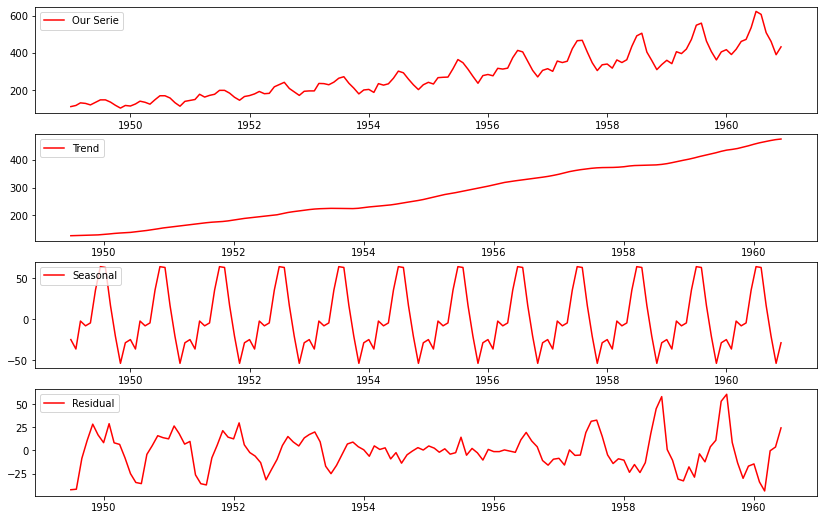

In [96]:
plt.figure(figsize=(14,9))
plt.subplot(411)
plt.plot(dataframe , label='Our Serie', c="r")
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', c='r')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', c='r')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', c='r')
plt.legend(loc='upper left')
plt.show()

In [97]:
# On va utiliser auto_arima car il permet de nous donne the best model and parameters
# tq seasonaty existe donc il doit utiliser des composantes seonalaires 

In [98]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [99]:
from pmdarima.arima import auto_arima

In [100]:
arima_model = auto_arima(dataframe['Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True,  
                          stepwise = True, n_fits=50)  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.37 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=4.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [101]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 03 Jan 2023   AIC                           1019.178
Time:                                     16:14:24   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [102]:
# Creation de model 

In [103]:
train_size = int (len(dataframe)*0.66)

In [104]:
X_train , X_test = dataframe[:train_size], dataframe[train_size:]

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [106]:
model = SARIMAX(X_train['Passengers'], order=(0,1,1), seasonal_order=(2,1,1,12))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [107]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Tue, 03 Jan 2023   AIC                            610.538
Time:                                    16:14:26   BIC                            622.572
Sample:                                01-01-1949   HQIC                           615.369
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3203      0.102     -3.140      0.002      -0.520      -0.120
ar.S.L12       0.6845      0.633      1.081      0.280      -0.556       1.925
ar.S.L24       0.3142      0.133      2.369      0.018       0.054       0.574
ma.S.L12      -0.9798      5.348     -0.183      0.855     -11.462       9.503
sigma2        78.6980    371.000      0.212      0.832    -648.449     805.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
start_index = len(X_train)
end_index = len(dataframe)-1
prediction = model_fit.predict(start_index, end_index) 

<AxesSubplot:xlabel='Month'>

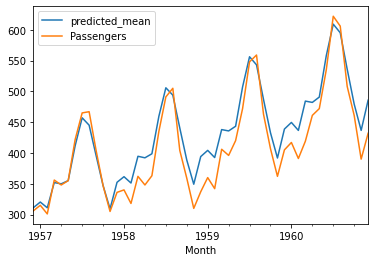

In [113]:
prediction.plot(legend = True) 
X_test['Passengers'].plot(legend = True)

Train Score: 16.14 RMSE
Test Score: 29.49 RMSE


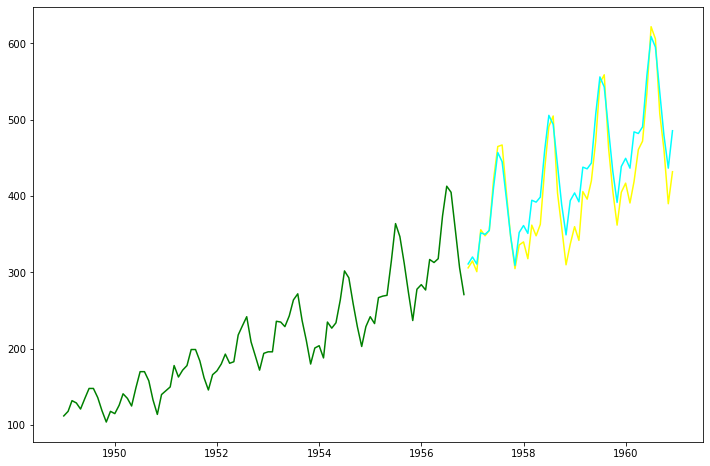

In [117]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

#from sklearn.metrics import r2_score
#score = r2_score(X_test, prediction)
#print("R2 score is: ", score)

#Forecast.. You can re-train on the entire dataset before forecasting
#For now let us use the trained model
# Forecast for the next 3 years 
 
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(prediction, label='Forecast', color='cyan')
plt.show()

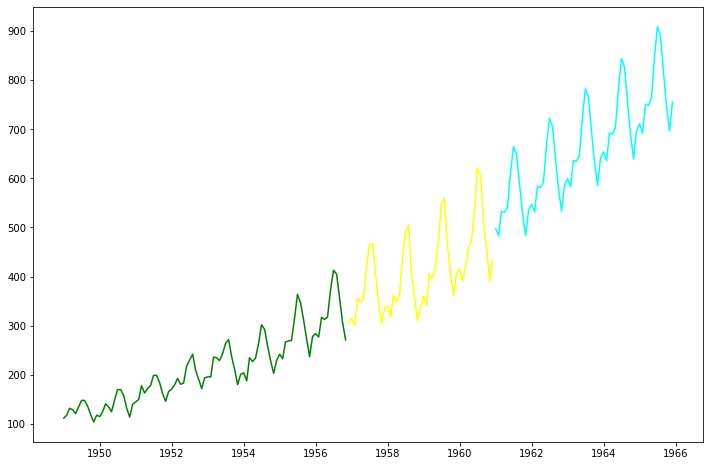

In [126]:
# Faire des predictions pour les 5 ans à venir
forecast = model_fit.predict(start = len(dataframe),  
                          end = (len(dataframe)-1) + 5 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.show()
